In [2]:
import set_math

success import scipy
success import pandas
success import numpy
success import sympy
success import matplotlib.pyplot
Hangul OK in your MAC !!!


In [3]:
data = pd.read_csv('../data/05. data_sample_V3', index_col = 0)
data.head()

,date,station_nbr,store_nbr,item_nbr,units,depart,codesum,dayofweek,is_holiday
0,2012-01-01,1,1,9,29,M,RA FZFG BR,Sun,holiday
1,2012-01-01,1,1,28,2,M,RA FZFG BR,Sun,holiday
2,2012-01-01,1,1,51,1,M,RA FZFG BR,Sun,holiday
3,2012-01-01,2,16,16,25,16,RA,Sun,holiday
4,2012-01-01,2,16,25,187,16,RA,Sun,holiday


In [4]:
item_unit_df = pd.DataFrame(data, columns=['date','station_nbr', 'store_nbr', 'item_nbr', 'units'])

In [5]:
item_unit_df.tail()

,date,station_nbr,store_nbr,item_nbr,units
118689,2014-10-31,19,30,16,19
118690,2014-10-31,19,30,44,69
118691,2014-10-31,19,30,65,1
118692,2014-10-31,20,17,9,24
118693,2014-10-31,20,17,37,25


In [6]:
store_nbr_1 = item_unit_df[item_unit_df['store_nbr'].isin([1])].reset_index(drop = True)
store_nbr_1.head()

,date,station_nbr,store_nbr,item_nbr,units
0,2012-01-01,1,1,9,29
1,2012-01-01,1,1,28,2
2,2012-01-01,1,1,51,1
3,2012-01-07,1,1,9,2
4,2012-01-07,1,1,28,1


In [7]:
store_nbr_1 = store_nbr_1.pivot_table(values = 'units', index = ['date'], columns=['item_nbr'], aggfunc = np.sum, fill_value = 0)

In [8]:
store_nbr_1 = store_nbr_1.reset_index()

In [19]:
store_nbr_1.head()

item_nbr,date,9,28,40,47,51,89,93,99
0,2012-01-01,29,2,0,0,1,0,0,0
1,2012-01-02,60,5,0,0,1,0,0,0
2,2012-01-03,15,9,0,0,0,0,0,0
3,2012-01-04,20,3,0,0,0,0,0,0
4,2012-01-05,16,1,0,0,0,0,0,0


In [27]:
nbr_9_array = np.array(store_nbr_1[9])

In [28]:
nbr_28_array = np.array(store_nbr_1[28])

In [30]:
nbr_40_array = np.array(store_nbr_1[40])

In [32]:
np.corrcoef(nbr_9_array,nbr_28_array)

array([[ 1.        ,  0.11897802],
       [ 0.11897802,  1.        ]])

In [33]:
np.corrcoef(nbr_9_array,nbr_40_array)

array([[ 1.        ,  0.10718982],
       [ 0.10718982,  1.        ]])

In [10]:
np.corrcoef(store_nbr_1[9],store_nbr_1[28])

array([[ 1.        ,  0.11897802],
       [ 0.11897802,  1.        ]])

In [11]:
list_ = [9,28,40,47,51,89,93,99]

In [101]:
corr = pd.DataFrame()

In [108]:
store_nbr_1.corr()

item_nbr,9,28,40,47,51,89,93,99
item_nbr,,,,,,,,
9,1.000000,0.118978,0.107190,-0.007694,0.105353,0.035821,0.013317,0.044022
28,0.118978,1.000000,0.090358,0.224022,0.087682,-0.003938,-0.099449,0.055952
40,0.107190,0.090358,1.000000,0.036602,0.219022,0.002646,-0.041844,0.087471
47,-0.007694,0.224022,0.036602,1.000000,-0.042762,-0.116828,-0.163624,0.305509
51,0.105353,0.087682,0.219022,-0.042762,1.000000,0.011336,-0.046455,-0.013525
89,0.035821,-0.003938,0.002646,-0.116828,0.011336,1.000000,0.113808,-0.069894
93,0.013317,-0.099449,-0.041844,-0.163624,-0.046455,0.113808,1.000000,-0.105892
99,0.044022,0.055952,0.087471,0.305509,-0.013525,-0.069894,-0.105892,1.000000


In [103]:
from matplotlib import pyplot as plt
from matplotlib import cm as cm

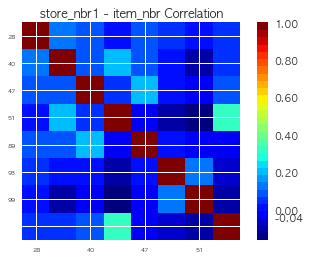

In [105]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(store_nbr_1.corr(), interpolation="nearest", cmap=cmap)
ax1.grid(True)
plt.title('store_nbr1 - item_nbr Correlation')
labels=[9,28,40,47,51,89,93,99]
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[-1,-.8,-0.6,-.04,-0.2,0,.2,0.4,0.6,0.8,1])
plt.show()